# GRUÎ°ú ÌïúÍ∏Ä ÏùòÎèÑ Î∂ÑÎ•ò (Intent Classification)


## Bidirectional GRU for better context understanding

### tensorflow

In [ ]:

# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏
!pip install konlpy matplotlib seaborn wordcloud -q


In [2]:
# ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ ÏÑ§Ïπò Î∞è ÏÑ§Ï†ï
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

# Ìè∞Ìä∏ ÏÑ§Ï†ï
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126380 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:292: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_la

ÏòàÏ†ú 6: GRUÎ°ú ÌïúÍ∏Ä ÏùòÎèÑ Î∂ÑÎ•ò (Intent Classification)
Ïñ¥Ìúò ÌÅ¨Í∏∞: 219
Ï¥ù Î¨∏Ïû• Ïàò: 100
ÏùòÎèÑ Ï¢ÖÎ•ò: 10Í∞ú
ÏùòÎèÑ Î™©Î°ù: [np.str_('alarm'), np.str_('call'), np.str_('game'), np.str_('info'), np.str_('message'), np.str_('music'), np.str_('schedule'), np.str_('search'), np.str_('shopping'), np.str_('weather')]

ÏùòÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò:
  weather: 10Í∞ú
  music: 10Í∞ú
  alarm: 10Í∞ú
  schedule: 10Í∞ú
  call: 10Í∞ú
  message: 10Í∞ú
  search: 10Í∞ú
  shopping: 10Í∞ú
  info: 10Í∞ú
  game: 10Í∞ú

ÎπàÎèÑ ÏÉÅÏúÑ 15Í∞ú Îã®Ïñ¥:
  Ïã∂Ïñ¥Ïöî: 9Ìöå
  ÏïåÎ†§Ï£ºÏÑ∏Ïöî: 8Ìöå
  Ïò§Îäò: 6Ìöå
  Ï†ÑÌôî: 6Ìöå
  Î©îÏãúÏßÄ: 6Ìöå
  Í≤åÏûÑ: 6Ìöå
  ÏïåÎûå: 5Ìöå
  ÎÇ¥Ïùº: 4Ìöå
  ÏùåÏïÖ: 4Ìöå
  ÏùºÏ†ï: 4Ìöå
  ÌôïÏù∏: 4Ìöå
  Ï£ºÎ¨∏: 4Ìöå
  ÎÇ†Ïî®: 3Ìöå
  Î™á: 3Ìöå
  Ï£º: 3Ìöå

ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:
  ÌèâÍ∑†: 3.1
  Ï§ëÍ∞ÑÍ∞í: 3.0
  ÏµúÎåÄ: 5
  ÏµúÏÜå: 2

Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú:
X shape: (100, 25)
y shape: (100, 10)
ÏùòÎèÑ ÌÅ¥ÎûòÏä§: ['alarm' 'call' 'game' 'info' 'message' 'music' 'schedule' 'search'
 's

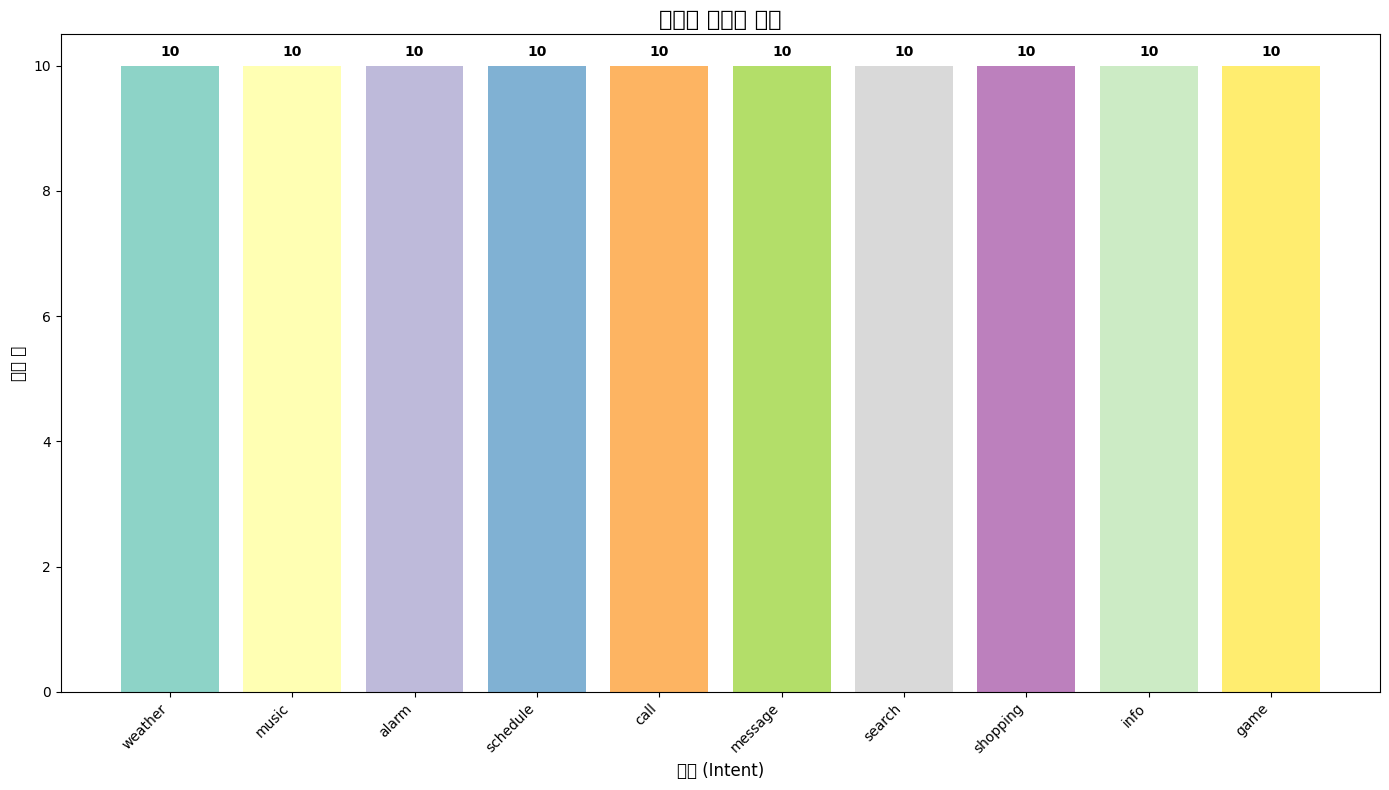

/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:311: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layo

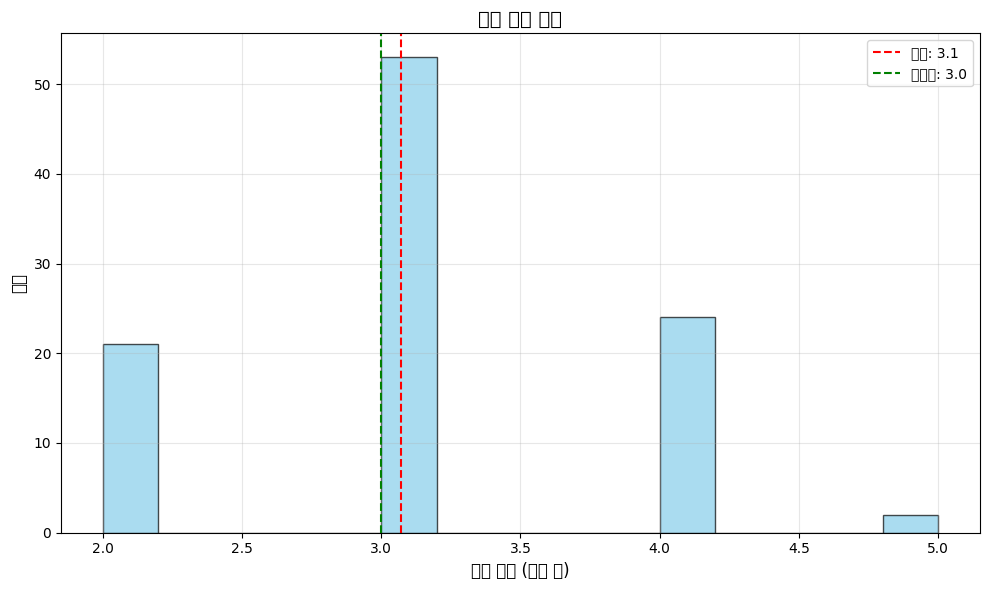

/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1627769111.py:347: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


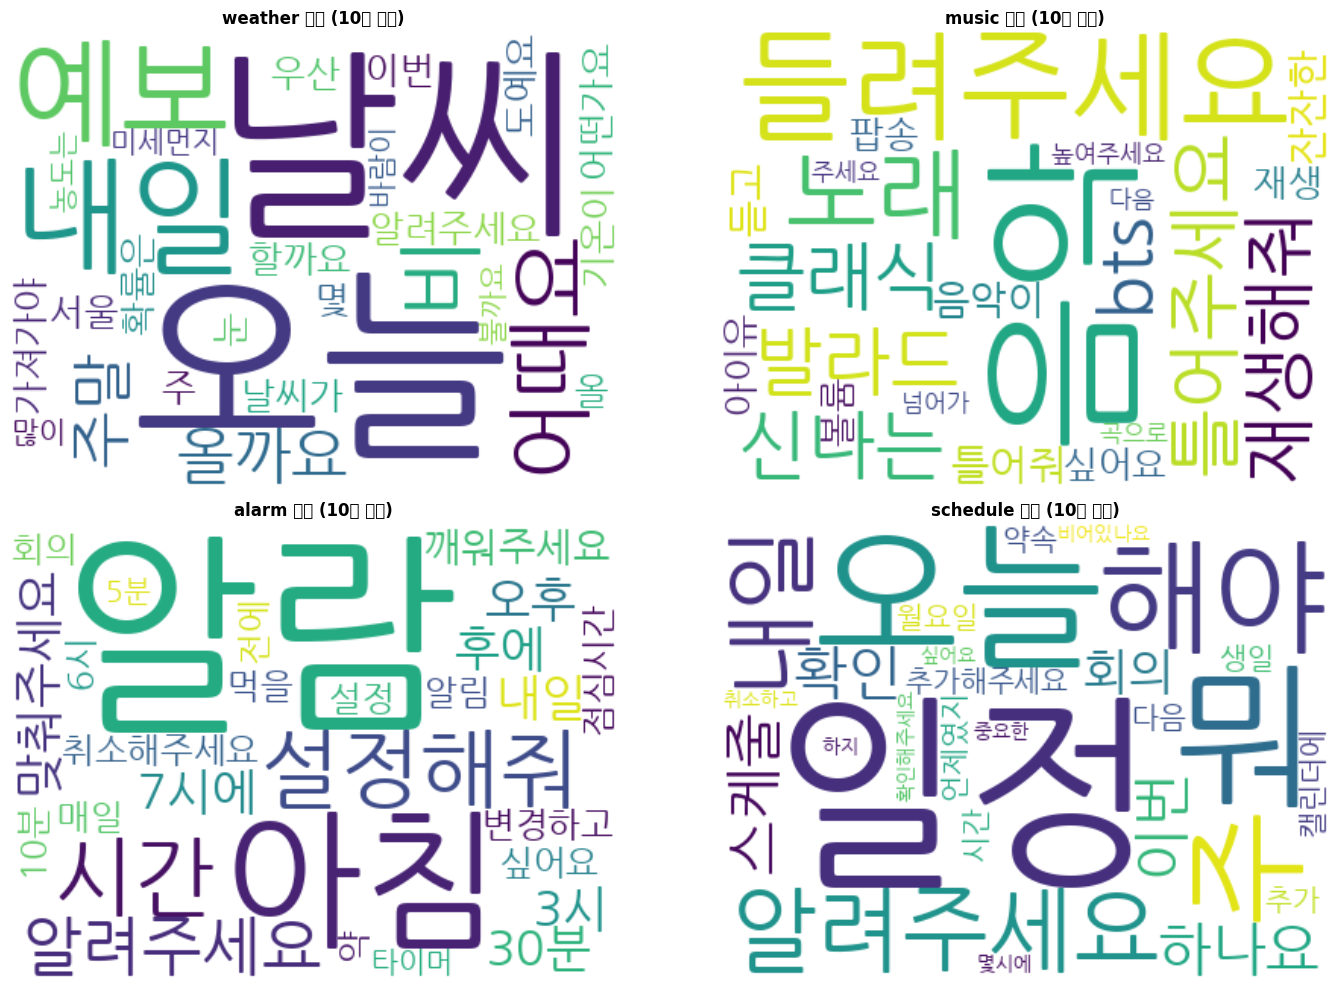

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 80Í∞ú
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 20Í∞ú

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏùòÎèÑ Î∂ÑÌè¨:
  info: 2Í∞ú
  message: 1Í∞ú
  shopping: 4Í∞ú
  call: 2Í∞ú
  schedule: 4Í∞ú
  alarm: 1Í∞ú
  music: 3Í∞ú
  weather: 2Í∞ú
  game: 1Í∞ú

Î™®Îç∏ Íµ¨Ï°∞:


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_1 (Embedding)         ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_1 (Bidirectional) ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d_1          ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3           ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ ?                     

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Î™®Îç∏ ÌõàÎ†® ÏãúÏûë...
Epoch 1/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 63ms/step - accuracy: 0.0508 - loss: 3.3829

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 313ms/step - accuracy: 0.0569 - loss: 3.3641 - val_accuracy: 0.1000 - val_loss: 2.3030 - learning_rate: 0.0010
Epoch 2/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 88ms/step - accuracy: 0.0851 - loss: 3.2139 - val_accuracy: 0.0500 - val_loss: 2.3042 - learning_rate: 0.0010
Epoch 3/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 87ms/step - accuracy: 0.1576 - loss: 2.8477 - val_accuracy: 0.0500 - val_loss: 2.3065 - learning_rate: 0.0010
Epoch 4/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 87ms/step - accuracy: 0.0842 - loss: 3.2276 - val_accuracy: 0.0500 - val_loss: 2.3083 - learning_rate: 0.0010
Epoch 5/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 87ms/step - accuracy: 0.1193 - loss: 2.7380 - val_accuracy: 0.0500 - val_loss: 2.3124 - learning_rate: 0.0010
Epoch 6/100
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

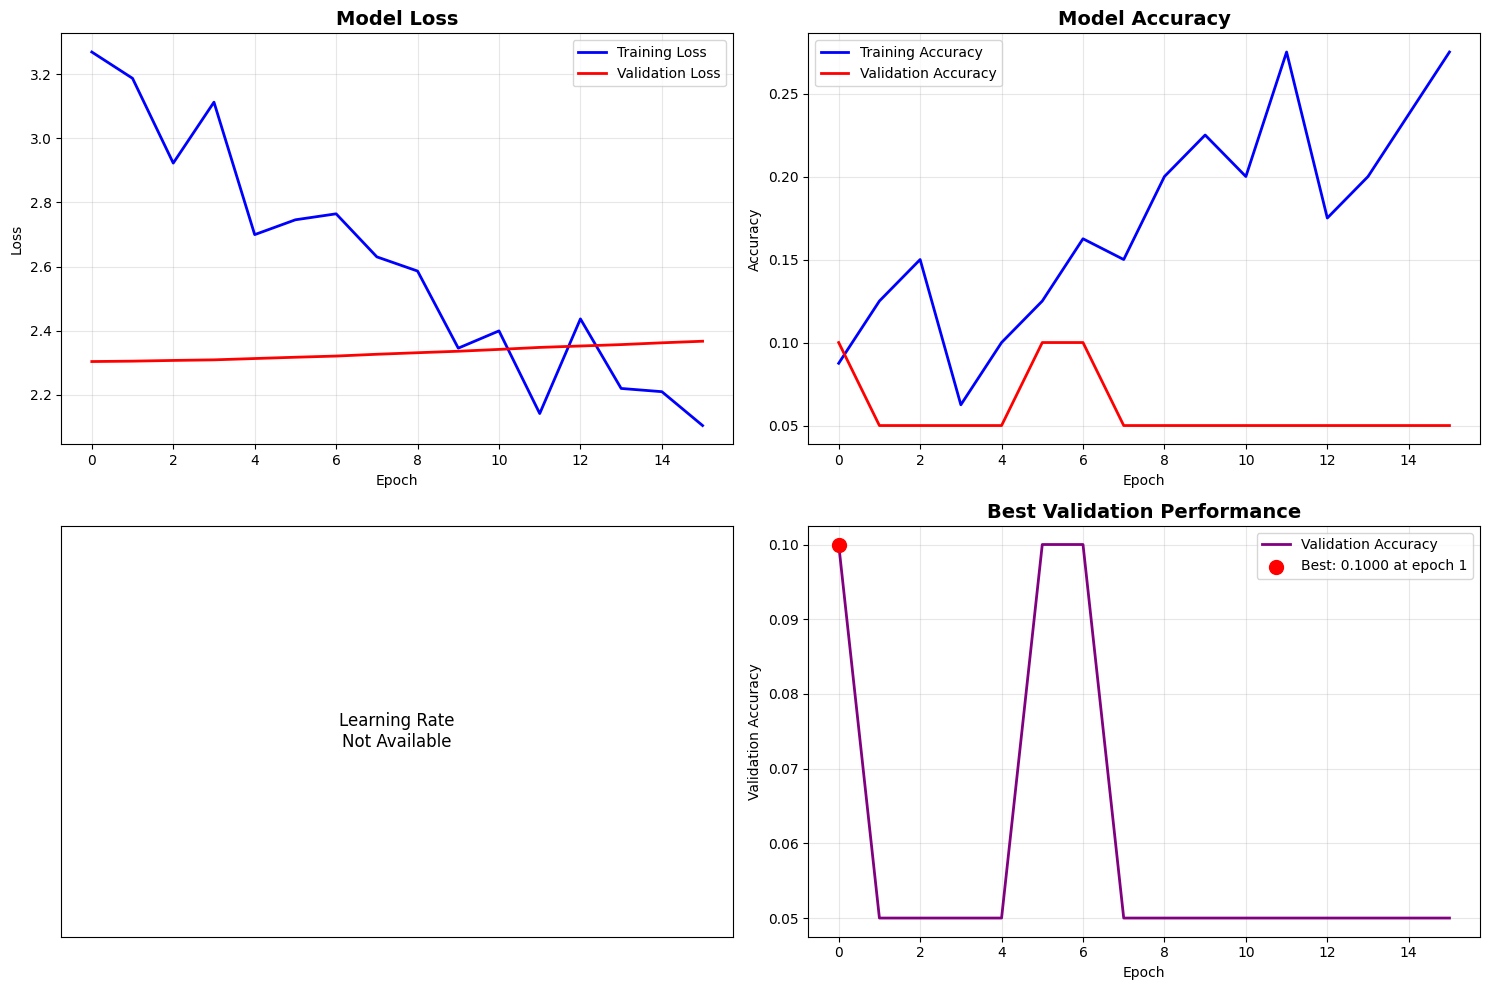

ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.1000
ÌÖåÏä§Ìä∏ ÏÜêÏã§: 2.3030
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 776ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ÏùòÎèÑ Î∂ÑÎ•ò ÏÑ±Îä• Î¶¨Ìè¨Ìä∏:
              precision    recall  f1-score   support

       alarm       0.00      0.00      0.00         1
        call       0.00      0.00      0.00         2
        game       0.00      0.00      0.00         1
        info       0.13      1.00      0.24         2
     message       0.00      0.00      0.00         1
       music       0.00      0.00      0.00         3
    schedule       0.00      0.00      0.00         4
    shopping       0.00      0.00      0.00         4
     weather       0.00      0.00      0.00         2

    accuracy                           0.10        20
   macro avg       0.01      0.11      0.03        20
weighted avg       0.01      0.10      0.02        20



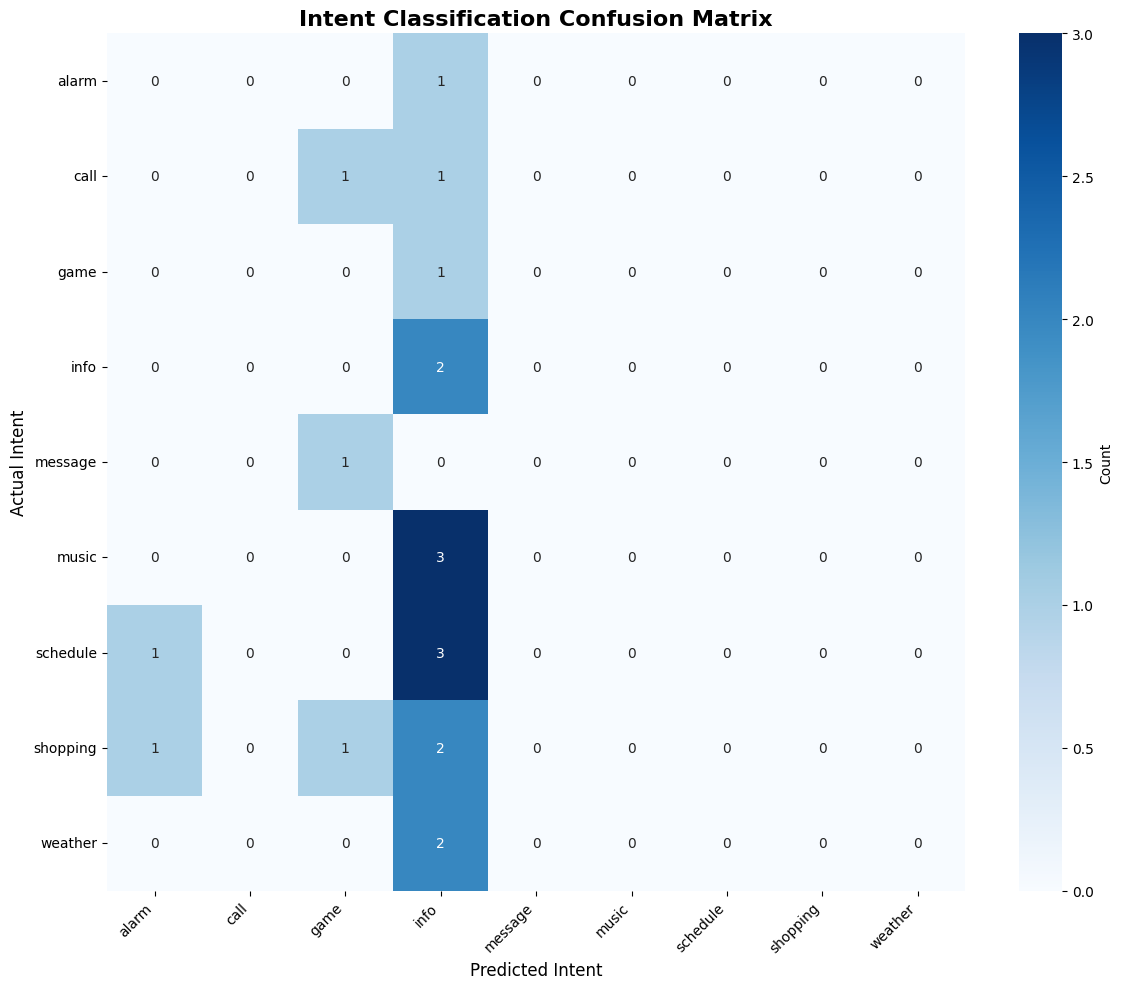


ÍµêÏ∞® Í≤ÄÏ¶ù ÏàòÌñâ Ïó¨Î∂ÄÎ•º ÏÑ†ÌÉùÌïòÏÑ∏Ïöî...

ÏÉàÎ°úÏö¥ Î¨∏Ïû• ÏùòÎèÑ Î∂ÑÎ•ò Í≤∞Í≥º
1. üéÆ Î¨∏Ïû•: 'ÎÇ¥Ïùº Ïò§Ï†ÑÏóê ÎπÑÍ∞Ä Ïò¨ÍπåÏöî?'
   ÏòàÏ∏° ÏùòÎèÑ: game (Ïã†Î¢∞ÎèÑ: 0.101)
   ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏°:
     1. üéÆ game: 0.101
     2. ‚ÑπÔ∏è info: 0.101
     3. üå§Ô∏è weather: 0.100

2. üéÆ Î¨∏Ïû•: 'Ï¢ãÏïÑÌïòÎäî Í∞ÄÏàòÏùò ÎÖ∏Îûò Îì§Î†§Ï£ºÏÑ∏Ïöî'
   ÏòàÏ∏° ÏùòÎèÑ: game (Ïã†Î¢∞ÎèÑ: 0.101)
   ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏°:
     1. üéÆ game: 0.101
     2. ‚ÑπÔ∏è info: 0.101
     3. üõí shopping: 0.100

3. üéÆ Î¨∏Ïû•: 'Ïò§ÌõÑ 2ÏãúÏóê ÏïåÎûå ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî'
   ÏòàÏ∏° ÏùòÎèÑ: game (Ïã†Î¢∞ÎèÑ: 0.101)
   ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏°:
     1. üéÆ game: 0.101
     2. ‚ÑπÔ∏è info: 0.101
     3. ‚è∞ alarm: 0.100

4. ‚ÑπÔ∏è Î¨∏Ïû•: 'Ïò§Îäò Ïò§ÌõÑÏóê ÌöåÏùò ÏûàÎÇòÏöî?'
   ÏòàÏ∏° ÏùòÎèÑ: info (Ïã†Î¢∞ÎèÑ: 0.101)
   ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏°:
     1. ‚ÑπÔ∏è info: 0.101
     2. ‚è∞ alarm: 0.100
     3. üéÆ game: 0.100

5. ‚è∞ Î¨∏Ïû•: 'ÏπúÍµ¨ÌïúÌÖå Ï†ÑÌôî Í±∏Ïñ¥Ï£ºÏÑ∏Ïöî'
   ÏòàÏ∏° ÏùòÎèÑ: alarm (Ïã†Î¢∞ÎèÑ: 0.101)
 

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout, GlobalMaxPooling1D, BatchNormalization, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# ÌïúÍ∏Ä ÏùòÎèÑ Î∂ÑÎ•ò Îç∞Ïù¥ÌÑ∞ÏÖã (Ïä§ÎßàÌä∏ Ïñ¥ÏãúÏä§ÌÑ¥Ìä∏Ïö©)
korean_intent_data = [
    # ÎÇ†Ïî® Î¨∏Ïùò (weather)
    ("Ïò§Îäò ÎÇ†Ïî® Ïñ¥ÎïåÏöî?", "weather"),
    ("ÎÇ¥Ïùº ÎπÑ Ïò¨ÍπåÏöî?", "weather"),
    ("Ï£ºÎßê ÎÇ†Ïî® ÏòàÎ≥¥ ÏïåÎ†§Ï£ºÏÑ∏Ïöî", "weather"),
    ("ÏÑúÏö∏ ÎÇ†Ïî®Í∞Ä Ïñ¥Îñ§Í∞ÄÏöî?", "weather"),
    ("Ïö∞ÏÇ∞ Í∞ÄÏ†∏Í∞ÄÏïº Ìï†ÍπåÏöî?", "weather"),
    ("Ïò§Îäò Í∏∞Ïò®Ïù¥ Î™á ÎèÑÏòàÏöî?", "weather"),
    ("ÎÇ¥Ïùº Îàà Ïò¨ ÌôïÎ•†ÏùÄ?", "weather"),
    ("Ïù¥Î≤à Ï£º ÎÇ†Ïî® ÏòàÎ≥¥", "weather"),
    ("Ïò§Îäò ÎØ∏ÏÑ∏Î®ºÏßÄ ÎÜçÎèÑÎäî?", "weather"),
    ("Î∞îÎûåÏù¥ ÎßéÏù¥ Î∂àÍπåÏöî?", "weather"),

    # ÏùåÏïÖ Ïû¨ÏÉù (music)
    ("ÏùåÏïÖ ÌãÄÏñ¥Ï£ºÏÑ∏Ïöî", "music"),
    ("Î∞úÎùºÎìú Îì§Î†§Ï£ºÏÑ∏Ïöî", "music"),
    ("ÌÅ¥ÎûòÏãù ÏùåÏïÖ Ïû¨ÏÉùÌï¥Ï§ò", "music"),
    ("BTS ÎÖ∏Îûò Îì§Î†§Ï£ºÏÑ∏Ïöî", "music"),
    ("Ïã†ÎÇòÎäî ÏùåÏïÖ ÌãÄÏñ¥Ï§ò", "music"),
    ("ÏûîÏûîÌïú ÏùåÏïÖÏù¥ Îì£Í≥† Ïã∂Ïñ¥Ïöî", "music"),
    ("ÏïÑÏù¥Ïú† ÎÖ∏Îûò Ïû¨ÏÉù", "music"),
    ("ÌåùÏÜ° Îì§Î†§Ï£ºÏÑ∏Ïöî", "music"),
    ("ÏùåÏïÖ Î≥ºÎ•® ÎÜíÏó¨Ï£ºÏÑ∏Ïöî", "music"),
    ("Îã§Ïùå Í≥°ÏúºÎ°ú ÎÑòÏñ¥Í∞Ä Ï£ºÏÑ∏Ïöî", "music"),

    # ÏïåÎûå ÏÑ§Ï†ï (alarm)
    ("ÎÇ¥Ïùº ÏïÑÏπ® 7ÏãúÏóê ÏïåÎûå ÎßûÏ∂∞Ï£ºÏÑ∏Ïöî", "alarm"),
    ("Ïò§ÌõÑ 3Ïãú ÏïåÎûå ÏÑ§Ï†ïÌï¥Ï§ò", "alarm"),
    ("30Î∂Ñ ÌõÑÏóê Íπ®ÏõåÏ£ºÏÑ∏Ïöî", "alarm"),
    ("ÏïåÎûå Ï∑®ÏÜåÌï¥Ï£ºÏÑ∏Ïöî", "alarm"),
    ("ÏïåÎûå ÏãúÍ∞Ñ Î≥ÄÍ≤ΩÌïòÍ≥† Ïã∂Ïñ¥Ïöî", "alarm"),
    ("Îß§Ïùº ÏïÑÏπ® 6Ïãú ÏïåÎûå", "alarm"),
    ("Ï†êÏã¨ÏãúÍ∞Ñ ÏïåÎ¶º ÏÑ§Ï†ï", "alarm"),
    ("ÏïΩ Î®πÏùÑ ÏãúÍ∞Ñ ÏïåÎ†§Ï£ºÏÑ∏Ïöî", "alarm"),
    ("ÌöåÏùò 10Î∂Ñ Ï†ÑÏóê ÏïåÎ†§Ï£ºÏÑ∏Ïöî", "alarm"),
    ("ÌÉÄÏù¥Î®∏ 5Î∂Ñ ÏÑ§Ï†ïÌï¥Ï§ò", "alarm"),

    # ÏùºÏ†ï Í¥ÄÎ¶¨ (schedule)
    ("Ïò§Îäò ÏùºÏ†ï ÏïåÎ†§Ï£ºÏÑ∏Ïöî", "schedule"),
    ("ÎÇ¥Ïùº Î≠ê Ìï¥Ïïº ÌïòÎÇòÏöî?", "schedule"),
    ("Ïù¥Î≤à Ï£º Ïä§ÏºÄÏ§Ñ ÌôïÏù∏", "schedule"),
    ("ÌöåÏùò ÏùºÏ†ï Ï∂îÍ∞ÄÌï¥Ï£ºÏÑ∏Ïöî", "schedule"),
    ("ÏïΩÏÜç ÏãúÍ∞Ñ Ïñ∏Ï†úÏòÄÏßÄ?", "schedule"),
    ("Ï∫òÎ¶∞ÎçîÏóê ÏÉùÏùº Ï∂îÍ∞Ä", "schedule"),
    ("Îã§Ïùå Ï£º ÏõîÏöîÏùº ÎπÑÏñ¥ÏûàÎÇòÏöî?", "schedule"),
    ("ÏùºÏ†ï Ï∑®ÏÜåÌïòÍ≥† Ïã∂Ïñ¥Ïöî", "schedule"),
    ("Ï§ëÏöîÌïú ÏùºÏ†ï ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî", "schedule"),
    ("Ïò§Îäò Î™áÏãúÏóê Î≠ê Ìï¥Ïïº ÌïòÏßÄ?", "schedule"),

    # Ï†ÑÌôî Í±∏Í∏∞ (call)
    ("ÏóÑÎßàÌïúÌÖå Ï†ÑÌôî Í±∏Ïñ¥Ï£ºÏÑ∏Ïöî", "call"),
    ("ÍπÄÏ≤†ÏàòÏóêÍ≤å Ï†ÑÌôîÌï¥Ï§ò", "call"),
    ("ÌöåÏÇ¨Ïóê Ï†ÑÌôî Ïó∞Í≤∞", "call"),
    ("Î≥ëÏõê ÏòàÏïΩ Ï†ÑÌôî", "call"),
    ("ÌÉùÏãú Î∂àÎü¨Ï£ºÏÑ∏Ïöî", "call"),
    ("Î∞∞Îã¨ Ï£ºÎ¨∏ Ï†ÑÌôî", "call"),
    ("ÏπúÍµ¨ÌïúÌÖå Ï†ÑÌôî Í±∏Í≥† Ïã∂Ïñ¥Ïöî", "call"),
    ("Í∏¥Í∏âÏ†ÑÌôî Ïó∞Í≤∞", "call"),
    ("Í≥†Í∞ùÏÑºÌÑ∞Ïóê Î¨∏Ïùò Ï†ÑÌôî", "call"),
    ("Ïó∞ÎùΩÏ≤òÏóêÏÑú Ï∞æÏïÑÏÑú Ï†ÑÌôîÌï¥Ï§ò", "call"),

    # Î©îÏãúÏßÄ Ï†ÑÏÜ° (message)
    ("Î¨∏Ïûê Î≥¥ÎÇ¥Ï£ºÏÑ∏Ïöî", "message"),
    ("Ïπ¥ÌÜ° Î≥¥ÎÇ¥Ï§ò", "message"),
    ("ÌöåÏÇ¨Ïóê ÏßÄÍ∞Å Î©îÏãúÏßÄ Ï†ÑÏÜ°", "message"),
    ("Í∞ÄÏ°±Îì§ÏóêÍ≤å ÏïàÎ∂Ä Î©îÏãúÏßÄ", "message"),
    ("ÏïΩÏÜç Ïû•ÏÜå Î≥ÄÍ≤Ω Î¨∏Ïûê", "message"),
    ("ÏÉùÏùº Ï∂ïÌïò Î©îÏãúÏßÄ Î≥¥ÎÇ¥Í∏∞", "message"),
    ("Ïù¥Î©îÏùº ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî", "message"),
    ("Îã®Ï≤¥ Î©îÏãúÏßÄ Ï†ÑÏÜ°", "message"),
    ("Î©îÏãúÏßÄ ÎãµÏû• Î≥¥ÎÇ¥Ï§ò", "message"),
    ("ÏùΩÏßÄ ÏïäÏùÄ Î©îÏãúÏßÄ ÌôïÏù∏", "message"),

    # Í≤ÄÏÉâ (search)
    ("ÎßõÏßë Í≤ÄÏÉâÌï¥Ï£ºÏÑ∏Ïöî", "search"),
    ("ÏòÅÌôîÍ¥Ä Ï∞æÏïÑÏ§ò", "search"),
    ("Ï£ºÎ≥Ä Ïπ¥Ìéò Ïñ¥Îîî ÏûàÎÇòÏöî?", "search"),
    ("ÏÑúÏ†ê ÏúÑÏπò ÏïåÎ†§Ï£ºÏÑ∏Ïöî", "search"),
    ("Î≥ëÏõê Ï∞æÍ≥† ÏûàÏñ¥Ïöî", "search"),
    ("Ï£ºÏú†ÏÜå Ïñ¥ÎîîÏóê ÏûàÏßÄ?", "search"),
    ("Ìé∏ÏùòÏ†ê 24ÏãúÍ∞Ñ ÌïòÎäî Í≥≥", "search"),
    ("ÏùÄÌñâ ÏòÅÏóÖÏãúÍ∞Ñ Í≤ÄÏÉâ", "search"),
    ("ÏßÄÌïòÏ≤† ÎÖ∏ÏÑ†ÎèÑ Î≥¥Ïó¨Ï§ò", "search"),
    ("Î≤ÑÏä§ ÏãúÍ∞ÑÌëú ÌôïÏù∏", "search"),

    # ÏáºÌïë (shopping)
    ("Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ Ïó¥Ïñ¥Ï£ºÏÑ∏Ïöî", "shopping"),
    ("Ìú¥ÎåÄÌè∞ ÏºÄÏù¥Ïä§ Ï£ºÎ¨∏ÌïòÍ≥† Ïã∂Ïñ¥Ïöî", "shopping"),
    ("ÏÉùÌïÑÌíà Ï£ºÎ¨∏ Î™©Î°ù", "shopping"),
    ("Î∞∞Îã¨ÏùåÏãù Ï£ºÎ¨∏Ìï†Í≤åÏöî", "shopping"),
    ("Ï±Ö Ïò®ÎùºÏù∏ÏúºÎ°ú Ï£ºÎ¨∏", "shopping"),
    ("Ïò∑ ÏÇ¨Ïù¥Ï¶à ÌôïÏù∏ÌïòÍ≥† Ïã∂Ïñ¥Ïöî", "shopping"),
    ("Ìï†Ïù∏ Ï†ïÎ≥¥ ÏïåÎ†§Ï£ºÏÑ∏Ïöî", "shopping"),
    ("Ïû•Î∞îÍµ¨Îãà ÌôïÏù∏Ìï¥Ï§ò", "shopping"),
    ("Í≤∞Ï†úÌïòÍ≥† Ïã∂Ïñ¥Ïöî", "shopping"),
    ("Ï£ºÎ¨∏ Ï∑®ÏÜåÌïòÍ≥† Ïã∂ÏäµÎãàÎã§", "shopping"),

    # Ï†ïÎ≥¥ Î¨∏Ïùò (info)
    ("Ïò§ÎäòÏù¥ Î™á ÏùºÏù¥ÏóêÏöî?", "info"),
    ("ÏßÄÍ∏à Î™á ÏãúÏù∏Í∞ÄÏöî?", "info"),
    ("ÌôòÏú® Ï†ïÎ≥¥ ÏïåÎ†§Ï£ºÏÑ∏Ïöî", "info"),
    ("Ï£ºÏãù ÏãúÏÑ∏ ÌôïÏù∏", "info"),
    ("Î°úÎòê ÎãπÏ≤®Î≤àÌò∏", "info"),
    ("Ïò§Îäò Îâ¥Ïä§ ÏöîÏïΩÌï¥Ï§ò", "info"),
    ("ÏΩîÎ°úÎÇò ÌôïÏßÑÏûê Ïàò", "info"),
    ("ÍµêÌÜµ ÏÉÅÌô© Ïñ¥ÎïåÏöî?", "info"),
    ("Ïú†Í∞Ä Ï†ïÎ≥¥ ÏïåÎ†§Ï£ºÏÑ∏Ïöî", "info"),
    ("Í≥µÌú¥Ïùº Ïñ∏Ï†úÏù∏Í∞ÄÏöî?", "info"),

    # Í≤åÏûÑ (game)
    ("Í≤åÏûÑÌïòÍ≥† Ïã∂Ïñ¥Ïöî", "game"),
    ("ÌÄ¥Ï¶à ÎÇ¥Ï£ºÏÑ∏Ïöî", "game"),
    ("ÎÅùÎßêÏûáÍ∏∞ Ìï†ÍπåÏöî?", "game"),
    ("Ïà´Ïûê ÎßûÌûàÍ∏∞ Í≤åÏûÑ", "game"),
    ("Í∞ÄÏúÑÎ∞îÏúÑÎ≥¥ ÌïòÏûê", "game"),
    ("Ïû¨ÎØ∏ÏûàÎäî Í≤åÏûÑ Ï∂îÏ≤ú", "game"),
    ("ÎëêÎáå Í≤åÏûÑ ÌïòÍ≥† Ïã∂Ïñ¥Ïöî", "game"),
    ("Îã®Ïñ¥ Í≤åÏûÑ Ìï¥Ïöî", "game"),
    ("Ï∂îÎ¶¨ Í≤åÏûÑ ÏãúÏûë", "game"),
    ("Í∞ÑÎã®Ìïú Í≤åÏûÑ ÏûàÎÇòÏöî?", "game")
]

class KoreanIntentClassifier:
    def __init__(self, max_features=3000, max_len=30):
        self.max_features = max_features
        self.max_len = max_len
        self.tokenizer = Tokenizer(
            num_words=max_features,
            oov_token="<OOV>",
            filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
        )
        self.label_encoder = LabelEncoder()

    def preprocess_text(self, text):
        # ÌïúÍ∏Ä ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
        text = re.sub(r'[^\w\s]', '', text)  # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
        text = re.sub(r'\s+', ' ', text)     # Í≥µÎ∞± Ï†ïÎ¶¨
        text = text.strip().lower()
        return text

    def prepare_data(self, intent_data):
        # ÌÖçÏä§Ìä∏ÏôÄ ÏùòÎèÑ Î∂ÑÎ¶¨
        texts = [self.preprocess_text(item[0]) for item in intent_data]
        intents = [item[1] for item in intent_data]

        # ÏùòÎèÑ Ïù∏ÏΩîÎî©
        encoded_intents = self.label_encoder.fit_transform(intents)
        self.num_classes = len(self.label_encoder.classes_)

        # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÌïôÏäµ
        self.tokenizer.fit_on_texts(texts)

        # Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ
        vocab_size = len(self.tokenizer.word_index)
        intent_counts = Counter(intents)

        print(f"Ïñ¥Ìúò ÌÅ¨Í∏∞: {vocab_size:,}")
        print(f"Ï¥ù Î¨∏Ïû• Ïàò: {len(texts)}")
        print(f"ÏùòÎèÑ Ï¢ÖÎ•ò: {self.num_classes}Í∞ú")
        print(f"ÏùòÎèÑ Î™©Î°ù: {list(self.label_encoder.classes_)}")

        print("\nÏùòÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò:")
        for intent, count in intent_counts.items():
            print(f"  {intent}: {count}Í∞ú")

        # ÎπàÎèÑ ÏÉÅÏúÑ Îã®Ïñ¥Îì§
        word_freq = sorted(self.tokenizer.word_counts.items(),
                          key=lambda x: x[1], reverse=True)
        print("\nÎπàÎèÑ ÏÉÅÏúÑ 15Í∞ú Îã®Ïñ¥:")
        for word, freq in word_freq[:15]:
            print(f"  {word}: {freq}Ìöå")

        # ÏãúÌÄÄÏä§ Î≥ÄÌôò
        sequences = self.tokenizer.texts_to_sequences(texts)

        # ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Î∂ÑÏÑù
        seq_lengths = [len(seq) for seq in sequences]
        print(f"\nÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:")
        print(f"  ÌèâÍ∑†: {np.mean(seq_lengths):.1f}")
        print(f"  Ï§ëÍ∞ÑÍ∞í: {np.median(seq_lengths):.1f}")
        print(f"  ÏµúÎåÄ: {np.max(seq_lengths)}")
        print(f"  ÏµúÏÜå: {np.min(seq_lengths)}")

        # Ìå®Îî©
        X = pad_sequences(sequences, maxlen=self.max_len, padding='post', truncating='post')
        y = to_categorical(encoded_intents, num_classes=self.num_classes)

        return X, y, texts, intents

    def build_model(self, embedding_dim=128, gru_units=64):
        model = Sequential([
            # Embedding layer
            Embedding(self.max_features, embedding_dim, input_length=self.max_len),

            # Bidirectional GRU for better context understanding
            Bidirectional(GRU(gru_units,
                             dropout=0.3,
                             recurrent_dropout=0.3,
                             return_sequences=True)),

            # Global Max Pooling for feature extraction
            GlobalMaxPooling1D(),

            # Batch normalization
            BatchNormalization(),

            # Dense layers
            Dense(128, activation='relu'),
            Dropout(0.5),

            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),

            Dense(32, activation='relu'),
            Dropout(0.2),

            # Output layer
            Dense(self.num_classes, activation='softmax')
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def predict_intent(self, model, text):
        processed_text = self.preprocess_text(text)
        sequence = self.tokenizer.texts_to_sequences([processed_text])
        padded = pad_sequences(sequence, maxlen=self.max_len, padding='post', truncating='post')

        predictions = model.predict(padded, verbose=0)[0]
        predicted_idx = np.argmax(predictions)
        predicted_intent = self.label_encoder.inverse_transform([predicted_idx])[0]
        confidence = predictions[predicted_idx]

        # ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏° Í≤∞Í≥º
        top_3_idx = np.argsort(predictions)[-3:][::-1]
        top_3_results = []
        for idx in top_3_idx:
            intent = self.label_encoder.inverse_transform([idx])[0]
            prob = predictions[idx]
            top_3_results.append((intent, prob))

        return predicted_intent, confidence, top_3_results

def plot_intent_distribution(intents):
    """ÏùòÎèÑ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî"""
    intent_counts = Counter(intents)
    intents_list = list(intent_counts.keys())
    counts = list(intent_counts.values())

    plt.figure(figsize=(14, 8))
    colors = plt.cm.Set3(np.linspace(0, 1, len(intents_list)))
    bars = plt.bar(intents_list, counts, color=colors)

    plt.title('ÏùòÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨', fontsize=16, fontweight='bold')
    plt.xlabel('ÏùòÎèÑ (Intent)', fontsize=12)
    plt.ylabel('Î¨∏Ïû• Ïàò', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                str(count), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

def plot_sequence_length_distribution(sequences):
    """ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî"""
    seq_lengths = [len(seq) for seq in sequences]

    plt.figure(figsize=(10, 6))
    plt.hist(seq_lengths, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(np.mean(seq_lengths), color='red', linestyle='--',
                label=f'ÌèâÍ∑†: {np.mean(seq_lengths):.1f}')
    plt.axvline(np.median(seq_lengths), color='green', linestyle='--',
                label=f'Ï§ëÍ∞ÑÍ∞í: {np.median(seq_lengths):.1f}')

    plt.title('Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨', fontsize=14, fontweight='bold')
    plt.xlabel('Î¨∏Ïû• Í∏∏Ïù¥ (Îã®Ïñ¥ Ïàò)', fontsize=12)
    plt.ylabel('ÎπàÎèÑ', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def create_wordcloud(texts, intents):
    """ÏùòÎèÑÎ≥Ñ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±"""
    intent_texts = {}
    for text, intent in zip(texts, intents):
        if intent not in intent_texts:
            intent_texts[intent] = []
        intent_texts[intent].append(text)

    # ÏÉÅÏúÑ 4Í∞ú ÏùòÎèÑÏóê ÎåÄÌï¥ÏÑúÎßå ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
    top_intents = Counter(intents).most_common(4)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    # ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï (Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú ÏÑ§ÏπòÌñàÏúºÎØÄÎ°ú Í≤ΩÎ°ú ÏÇ¨Ïö©)
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'


    for i, (intent, count) in enumerate(top_intents):
        combined_text = ' '.join(intent_texts[intent])

        wordcloud = WordCloud(
            width=400, height=300,
            background_color='white',
            colormap='viridis',
            max_words=30,
            font_path=font_path # ÌïúÍ∏Ä Ìè∞Ìä∏Í∞Ä ÏûàÏúºÎ©¥ ÏÑ§Ï†ï
        ).generate(combined_text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'{intent} ÏùòÎèÑ ({count}Í∞ú Î¨∏Ïû•)', fontsize=12, fontweight='bold')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    """ÌõàÎ†® Í≥ºÏ†ï ÏãúÍ∞ÅÌôî"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Loss
    axes[0,0].plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
    axes[0,0].plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    axes[0,0].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Accuracy
    axes[0,1].plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
    axes[0,1].plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
    axes[0,1].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Accuracy')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # Learning Rate (if available)
    if 'lr' in history.history:
        axes[1,0].plot(history.history['lr'], 'g-', linewidth=2)
        axes[1,0].set_title('Learning Rate', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('Learning Rate')
        axes[1,0].set_yscale('log')
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].text(0.5, 0.5, 'Learning Rate\nNot Available',
                      ha='center', va='center', transform=axes[1,0].transAxes, fontsize=12)
        axes[1,0].set_xticks([])
        axes[1,0].set_yticks([])

    # Validation accuracy vs epochs with best point
    val_acc = history.history['val_accuracy']
    best_epoch = np.argmax(val_acc)
    best_acc = val_acc[best_epoch]

    axes[1,1].plot(val_acc, 'purple', linewidth=2, label='Validation Accuracy')
    axes[1,1].scatter(best_epoch, best_acc, color='red', s=100, zorder=5,
                     label=f'Best: {best_acc:.4f} at epoch {best_epoch+1}')
    axes[1,1].set_title('Best Validation Performance', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Epoch')
    axes[1,1].set_ylabel('Validation Accuracy')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    """ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî"""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    plt.title('Intent Classification Confusion Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Intent', fontsize=12)
    plt.ylabel('Actual Intent', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def cross_validate_model(classifier, X, y, cv_folds=5):
    """ÍµêÏ∞® Í≤ÄÏ¶ù"""
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = []

    print(f"\n{cv_folds}-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏãúÏûë...")

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, np.argmax(y, axis=1)), 1):
        print(f"Fold {fold}/{cv_folds} ÏßÑÌñâ Ï§ë...")

        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        # Î™®Îç∏ Íµ¨Ï∂ï Î∞è ÌõàÎ†®
        model = classifier.build_model()

        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10,
                                     restore_best_weights=True, verbose=0)

        model.fit(X_train_fold, y_train_fold,
                 epochs=50, batch_size=16,
                 validation_data=(X_val_fold, y_val_fold),
                 callbacks=[early_stopping], verbose=0)

        # Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        cv_scores.append(val_acc)
        print(f"  Fold {fold} Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {val_acc:.4f}")

    print(f"\nÍµêÏ∞® Í≤ÄÏ¶ù Í≤∞Í≥º:")
    print(f"  ÌèâÍ∑† Ï†ïÌôïÎèÑ: {np.mean(cv_scores):.4f} (¬± {np.std(cv_scores):.4f})")
    print(f"  ÏµúÍ≥† Ï†ïÌôïÎèÑ: {np.max(cv_scores):.4f}")
    print(f"  ÏµúÏ†Ä Ï†ïÌôïÎèÑ: {np.min(cv_scores):.4f}")

    return cv_scores

def run_intent_classification_example():
    print("=" * 80)
    print("ÏòàÏ†ú 6: GRUÎ°ú ÌïúÍ∏Ä ÏùòÎèÑ Î∂ÑÎ•ò (Intent Classification)")
    print("=" * 80)

    # 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    classifier = KoreanIntentClassifier(max_features=2000, max_len=25)
    X, y, texts, intents = classifier.prepare_data(korean_intent_data)

    print(f"\nÎç∞Ïù¥ÌÑ∞ ÌòïÌÉú:")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print(f"ÏùòÎèÑ ÌÅ¥ÎûòÏä§: {classifier.label_encoder.classes_}")

    # 2. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
    plot_intent_distribution(intents)

    # ÏãúÌÄÄÏä§Î•º ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôòÌï¥ÏÑú Í∏∏Ïù¥ Î∂ÑÌè¨ ÌôïÏù∏
    sequences = classifier.tokenizer.texts_to_sequences(texts)
    plot_sequence_length_distribution(sequences)

    # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± (ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏùå)
    try:
        create_wordcloud(texts, intents)
    except Exception as e:
        print(f"ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Ïò§Î•ò: {e}")

    # 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42 # Removed stratify=y
    )

    print(f"\nÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {X_train.shape[0]}Í∞ú")
    print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {X_test.shape[0]}Í∞ú")

    # Check class distribution in test set
    test_intents_encoded = np.argmax(y_test, axis=1)
    test_intents = classifier.label_encoder.inverse_transform(test_intents_encoded)
    test_intent_counts = Counter(test_intents)
    print("\nÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏùòÎèÑ Î∂ÑÌè¨:")
    for intent, count in test_intent_counts.items():
        print(f"  {intent}: {count}Í∞ú")


    # 4. Î™®Îç∏ Íµ¨Ï∂ï
    model = classifier.build_model(embedding_dim=128, gru_units=64)

    print("\nÎ™®Îç∏ Íµ¨Ï°∞:")
    model.summary()

    # 5. ÏΩúÎ∞± ÏÑ§Ï†ï
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=8, min_lr=1e-7),
        ModelCheckpoint('best_intent_model.h5', save_best_only=True,
                       monitor='val_accuracy', mode='max')
    ]

    # 6. Î™®Îç∏ ÌõàÎ†®
    print("\nÎ™®Îç∏ ÌõàÎ†® ÏãúÏûë...")
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=1
    )

    # 7. ÌõàÎ†® Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
    plot_training_history(history)

    # 8. Î™®Îç∏ ÌèâÍ∞Ä
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_accuracy:.4f}")
    print(f"ÌÖåÏä§Ìä∏ ÏÜêÏã§: {test_loss:.4f}")

    # 9. ÏòàÏ∏° Î∞è Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    class_names = classifier.label_encoder.classes_
    # Get the unique labels present in the test set
    unique_labels_in_test = np.unique(y_true)
    # Get the corresponding class names
    target_names_in_test = classifier.label_encoder.inverse_transform(unique_labels_in_test)

    print("\nÏùòÎèÑ Î∂ÑÎ•ò ÏÑ±Îä• Î¶¨Ìè¨Ìä∏:")
    # Use the unique labels and corresponding names in the classification_report
    print(classification_report(y_true, y_pred, labels=unique_labels_in_test, target_names=target_names_in_test))

    # 10. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
    # Only include classes present in the test set for confusion matrix
    plot_confusion_matrix(y_true, y_pred, target_names_in_test)

    # 11. ÍµêÏ∞® Í≤ÄÏ¶ù (ÏÑ†ÌÉùÏ†Å)
    print("\nÍµêÏ∞® Í≤ÄÏ¶ù ÏàòÌñâ Ïó¨Î∂ÄÎ•º ÏÑ†ÌÉùÌïòÏÑ∏Ïöî...")
    # cv_scores = cross_validate_model(classifier, X, y, cv_folds=3)

    # 12. ÏÉàÎ°úÏö¥ Î¨∏Ïû•Ïóê ÎåÄÌïú ÏùòÎèÑ Î∂ÑÎ•ò ÌÖåÏä§Ìä∏
    test_sentences = [
        "ÎÇ¥Ïùº Ïò§Ï†ÑÏóê ÎπÑÍ∞Ä Ïò¨ÍπåÏöî?",
        "Ï¢ãÏïÑÌïòÎäî Í∞ÄÏàòÏùò ÎÖ∏Îûò Îì§Î†§Ï£ºÏÑ∏Ïöî",
        "Ïò§ÌõÑ 2ÏãúÏóê ÏïåÎûå ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî",
        "Ïò§Îäò Ïò§ÌõÑÏóê ÌöåÏùò ÏûàÎÇòÏöî?",
        "ÏπúÍµ¨ÌïúÌÖå Ï†ÑÌôî Í±∏Ïñ¥Ï£ºÏÑ∏Ïöî",
        "ÏïàÎÖïÌïòÎã§Í≥† Î¨∏Ïûê Î≥¥ÎÇ¥Ï§ò",
        "Í∑ºÏ≤ò ÎßõÏßë Ïñ¥Îîî ÏûàÎäîÏßÄ Ï∞æÏïÑÏ£ºÏÑ∏Ïöî",
        "Ïò®ÎùºÏù∏ÏúºÎ°ú Ï±Ö Ï£ºÎ¨∏ÌïòÍ≥† Ïã∂Ïñ¥Ïöî",
        "ÏßÄÍ∏à Î™á ÏãúÏù∏ÏßÄ ÏïåÎ†§Ï£ºÏÑ∏Ïöî",
        "Ïû¨ÎØ∏ÏûàÎäî ÌÄ¥Ï¶à ÎÇ¥Ï£ºÏÑ∏Ïöî",
        "Ïò§Îäò ÎØ∏ÏÑ∏Î®ºÏßÄ ÎÜçÎèÑÍ∞Ä Ïñ¥Îñ§Í∞ÄÏöî?",
        "ÏûîÏûîÌïú ÌÅ¥ÎûòÏãù ÏùåÏïÖ Ïû¨ÏÉùÌï¥Ï§ò",
        "ÎÇ¥Ïùº ÏïÑÏπ® 6Ïãú 30Î∂ÑÏóê Íπ®ÏõåÏ£ºÏÑ∏Ïöî",
        "Ïù¥Î≤à Ï£ºÎßê ÏïΩÏÜç ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï§ò",
        "ÏßëÏóê Ï†ÑÌôî Í±∏Ïñ¥Ï£ºÏÑ∏Ïöî"
    ]

    print("\n" + "="*80)
    print("ÏÉàÎ°úÏö¥ Î¨∏Ïû• ÏùòÎèÑ Î∂ÑÎ•ò Í≤∞Í≥º")
    print("="*80)

    intent_emojis = {
        'weather': 'üå§Ô∏è',    # ÎÇ†Ïî®
        'music': 'üéµ',      # ÏùåÏïÖ
        'alarm': '‚è∞',      # ÏïåÎûå
        'schedule': 'üìÖ',   # ÏùºÏ†ï
        'call': 'üìû',       # Ï†ÑÌôî
        'message': 'üí¨',    # Î©îÏãúÏßÄ
        'search': 'üîç',     # Í≤ÄÏÉâ
        'shopping': 'üõí',   # ÏáºÌïë
        'info': '‚ÑπÔ∏è',       # Ï†ïÎ≥¥
        'game': 'üéÆ'        # Í≤åÏûÑ
    }

    correct_predictions = 0

    for i, sentence in enumerate(test_sentences, 1):
        predicted_intent, confidence, top_3 = classifier.predict_intent(model, sentence)
        emoji = intent_emojis.get(predicted_intent, 'ü§ñ')

        print(f"{i}. {emoji} Î¨∏Ïû•: '{sentence}'")
        print(f"   ÏòàÏ∏° ÏùòÎèÑ: {predicted_intent} (Ïã†Î¢∞ÎèÑ: {confidence:.3f})")
        print(f"   ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏°:")
        for j, (intent, prob) in enumerate(top_3, 1):
            intent_emoji = intent_emojis.get(intent, 'ü§ñ')
            print(f"     {j}. {intent_emoji} {intent}: {prob:.3f}")
        print()

    # 13. ÏùòÎèÑÎ≥Ñ ÏòàÏ∏° Ï†ïÌôïÎèÑ Î∂ÑÏÑù
    print("="*80)
    print("ÏùòÎèÑÎ≥Ñ ÏòàÏ∏° ÏÑ±Îä• Î∂ÑÏÑù")
    print("="*80)

    intent_performance = {}
    # Iterate through the unique labels present in the test set
    for label_idx in unique_labels_in_test:
        intent = classifier.label_encoder.inverse_transform([label_idx])[0]
        intent_mask = y_true == label_idx
        if np.sum(intent_mask) > 0:
            intent_accuracy = accuracy_score(y_true[intent_mask], y_pred[intent_mask])
            intent_performance[intent] = intent_accuracy


    # ÏÑ±Îä•ÏàúÏúºÎ°ú Ï†ïÎ†¨
    sorted_performance = sorted(intent_performance.items(), key=lambda x: x[1], reverse=True)

    print("ÏùòÎèÑÎ≥Ñ Ï†ïÌôïÎèÑ (ÎÜíÏùÄ Ïàú):")
    for intent, accuracy in sorted_performance:
        emoji = intent_emojis.get(intent, 'ü§ñ')
        print(f"  {emoji} {intent}: {accuracy:.3f}")

    return model, classifier, history

# Ïã§Ìñâ
if __name__ == "__main__":
    model, classifier, history = run_intent_classification_example()